<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>
<br>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=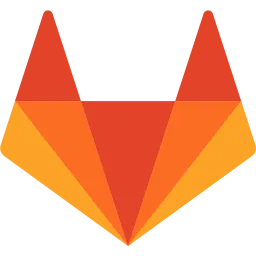" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CCase%20studies%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=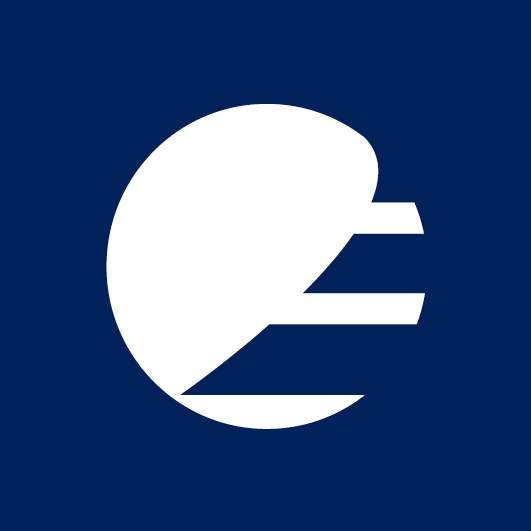" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh05%2FQuantifying_PIC_POC%2FQuantifying_PIC_POC.ipynb
                                "><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Acq_syn/Altimetry_cycles_orbits/Altimetry_orbit_cycle_selection.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download from the EUMETSAT Data Store

There are no prerequisite notebooks for this module.<br>

</div>
<hr>

# Selecting Copernicus altimetry products by orbital parameter

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| SRAL Level 2 Altimetry Global - Sentinel-3 | EO:EUM:DAT:0415 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">Description</a> |
| Poseidon-4 Altimetry Level 2 High Resolution - Sentinel-6 | EO:EUM:DAT:0855 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0855" target="_blank">Description</a> | EO:EUM:DAT:0855 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0855" target="_blank">Description</a>

### Learning outcomes

At the end of this notebook you will know how to;
* Access EUMETSAT Copernicus marine products from the EUMETSAT Data Store
* Construct search queries to select altimetry products by orbital parameter
* Download the selected products

### Outline

<center><img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Altimetry_orbits.png"/><br><b>Figure 1: Ground tracks for Sentinel-3 SRAL (left) and Sentinel-6 Poseidon-4 (right)</b></img></center><br>

We often want to search for specific Earth observation products by time and or region of interest, but when we are considering altimetry products it is often more useful to identify a given cycle, or relative orbit. By considering sea surface height anomaliesover a single cycle we can add a single point to our global sea-level rise curve, while extracting data over a relative orbit can give us a time series over a single point or track, which is useful for identifying extremes.<br><br>

<center><img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Altimetry_naming.png" width="50%"/><br><b>Figure 2: File naming conventions for Sentinel-3 SRAL (top) and Sentinel-6 Poseidon-4 (bottom)</b></img></center><br>

Much of the information we need is actually stored in the file names for Sentinel-3 and Sentinel-6 products, as shown above. You can find more information on the naming system for the products in the <a href="https://user.eumetsat.int/resources/user-guides/sentinel-safe-format-guide" target="_black">Sentinel-3</a> and <a href="https://www-cdn.eumetsat.int/files/2021-05/Jason-CS_Sentinel-6%20Generic%20File%20Naming%20Convention%20%28GFNC%29.pdf" target="_blank">Sentinel-6</a> product naming guides. However, the EUMETSAT Data Store encodes provides direct access to this information via product metadata, giving us an enhanced ability to search for and download the tracks we want.

In this notebook we will show how to access the EUMETSAT Data Store, perform searches by cycle and relative orbit parameters and download the relevant products.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Authenticating the EUMETSAT Data Store](#section2)
 1. [Step 3: Altimetry search options](#section3)
 1. [Step 4: Searching for our specified products by cycle](#section4)
 1. [Step 5: Plotting a single cycle](#section5)
 1. [Step 6: Searching for our specified products by relative orbit](#section6)
 1. [Step 7: Plotting a single relative orbit](#section7)
 1. [Step 8: Conclusions](#section8)
 1. [Step 9: Challenge (Optional)](#section9)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import cartopy                            # a package that helps with mapping and projection management
import datetime                           # a library that allows us to work with dates and times
import eumdac                             # a tool that helps us download via the eumetsat/data-store
import getpass                            # a library to help us enter passwords
import glob                               # a library that aids in searching for files
import matplotlib.pyplot as plt           # a library that support plotting
import numpy as np                        # a library that lets us work with arrays; we import this with a new name "np"
import os                                 # a library that allows us access to basic operating system commands
from pathlib import Path                  # a library to help us to construct system paths
import shutil                             # a library that allows us access to basic operating system commands like copy
import warnings                           # a library that helps us handle warnings
import xml.etree.ElementTree as ET        # a library that helps us parse XML files

# turn off any script warnings
warnings.filterwarnings('ignore')

We will make a few plots during this notebook, so lets quickly set our default fontsize for the whole notebook.

In [2]:
# set the default plot font size
plt.rcParams.update({'font.size': 18})

We are going to be running two experiments, one focussed on product cycles and one on product relative orbits. Lets create two directories `product_cycle` and `prodyct_relorbit` to store the data we need for both.

In [3]:
# Create a download directory for our altimetry products
download_dir_cycle = os.path.join(os.getcwd(), "products_cycle")
download_dir_relorbit = os.path.join(os.getcwd(), "products_relorbit")
os.makedirs(download_dir_cycle, exist_ok=True)
os.makedirs(download_dir_relorbit, exist_ok=True)

In the first instance of running this script, we want to download data, but in subsequent runs we may want to use what we have. The `download_data` switch below will tell us to download data (when `True`) or not (when `False`).

In [4]:
download_data = True

Next, we will define the parameters of our searches. Every "collection" (the term we use for a specific data type) is stored in the EUMETSAT Data Store by a specified collection ID. In our case, we want to identify the IDs for the data specified at the top of this notebook, the level-2 operational altimetry products from Sentinel-3 SRAL and Sentinel-6 Poseidon-4 (high resolution). We set these below.

In [5]:
S3_collectionID = "EO:EUM:DAT:0415"
S6_collectionID = "EO:EUM:DAT:0855"

Next we will set the "timeliness" if the data, which can be NR for near real-time, ST for short-time critical or NT for non time-critical. Different products are available at different timeliness, with the products that are more quickly available (e.g. NR) typically of slightly lower quality. We will look for NT products in both cases.

In [6]:
timeliness = "NT"

Now let us choose our orbital parameters for each experiment, selecting the cycle (`_cycle`), and relative orbit (`_relorbit`) in each case. Note that for the Sentinel-3 search, we are selecting only data from Sentinel-3B (`S3_satellite`) as the cycle numbers differ between the two satellites. NT altimetry products are distributed as half orbits, which means there are two in each relative orbit. By selecting the orbit direction (`_orbitdir`) we can select only the descending and ascending branch.

In [7]:
# S3 parameters
S3_satellite = "Sentinel-3B"
S3_cycle = 80
S3_relorbit = 308
S3_orbitdir = "DESCENDING"

# S6 parameters
S6_cycle = 118
S6_relorbit = 11
S6_orbitdir = "DESCENDING"

Finally, rather than download entire products, we will download just a single key components from each. In this case, we can construct the tracks from just the small xfdumenifest.xml file that describes the coverage of each track, so we'll get that to save disk space and download time. 

*Note: you can adapt the below to single out any combination of components to download*

In [8]:
components = ["xfdumanifest.xml"]

OK! Now we are ready to begin gathering our data for analysis, beginning by authenticating our access to the EUMETSAT Data Store.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Authenticating the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [9]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token 'b520244a-2d68-31fa-919e-db59c67ca741' expires 2024-05-13 10:07:19.906780


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [10]:
datastore = eumdac.DataStore(token)

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Altimetry search options
[Back to top](#TOCTOP)

</div>

No we have out `datastore` object, we can test some of our searches. Lets start by retrieving our collections using the `get_collection` method.

In [11]:
# Use collection ID
S3_collection = datastore.get_collection(S3_collectionID)
S6_collection = datastore.get_collection(S6_collectionID)

When we have a collection, we can test to see what search options by calling its `search_options` method. For example;

In [12]:
S3_collection.search_options # if you run S6.collections, you will find that it is the same

{'bbox': {'title': 'Inventory which has a spatial extent overlapping this bounding box',
  'options': []},
 'geo': {'title': 'Inventory which has a spatial extent overlapping this Well Known Text geometry',
  'options': []},
 'title': {'title': 'Can be used to define a wildcard search on the product title (product identifier), use set notation as OR and space as AND operator between multiple search terms',
  'options': [None]},
 'sat': {'title': 'Mission / Satellite',
  'options': ['Sentinel-3A', 'Sentinel-3B']},
 'type': {'title': 'Product Type', 'options': ['SR_2_WAT___']},
 'dtstart': {'title': 'Temporal Start', 'options': []},
 'dtend': {'title': 'Temporal End', 'options': []},
 'publication': {'title': 'publication date', 'options': []},
 'zone': {'title': 'Equi7grid main continental zone',
  'options': ['AN', 'NA', 'AS', 'OC', 'EU', 'SA', 'AF']},
 't6': {'title': 'Equi7grid 600km tile', 'options': []},
 'timeliness': {'title': 'Timeliness', 'options': ['NT', 'NR', 'ST']},
 'orbit

You will see that `cycle`, `relorbit` and `orbitdir` are all options, alongside other spatial and temporal search parameters.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Searching for our specified products by cycle
[Back to top](#TOCTOP)

</div>

Now we know our search options we can use them to identify our products of interest. For experiment one, lets prune by cycle. We can construct our search parameter like so;

In [13]:
S3_products = S3_collection.search(cycle=S3_cycle, sat=S3_satellite, timeliness=timeliness)

Lets iterate through each product to see what we have. We'll also calculate the time of the initial and final products in the search, so we can check our cycle length.

*Note: To reduce the length of this list, we'll only print out every 25th product.*

In [14]:
for product, index in zip(S3_products, range(len(S3_products))):
    if index == 0:
        # this calculates and prints the initial date
        init_datetime = datetime.datetime.strptime(str(product).split("_")[8], "%Y%m%dT%H%M%S")
        print(f'---{init_datetime}---')
    if index == len(S3_products) - 1:
        # this calculates and prints the final date
        final_datetime = datetime.datetime.strptime(str(product).split("_")[7], "%Y%m%dT%H%M%S")
        print(f'---{final_datetime} ({init_datetime - final_datetime}) ago ---')
    if np.mod(index, 25) == 0:
        print(f"{str(index + 1).zfill(3)}/{str(len(S3_products)).zfill(3)}: {product}")

---2023-06-20 22:25:04---
001/773: S3B_SR_2_WAT____20230620T213944_20230620T222504_20230716T154946_2720_080_385______MAR_O_NT_005.SEN3
026/773: S3B_SR_2_WAT____20230620T003215_20230620T011638_20230715T190158_2663_080_373______MAR_O_NT_005.SEN3
051/773: S3B_SR_2_WAT____20230619T033210_20230619T042023_20230714T213330_2893_080_360______MAR_O_NT_005.SEN3
076/773: S3B_SR_2_WAT____20230618T062734_20230618T071255_20230714T002235_2721_080_348______MAR_O_NT_005.SEN3
101/773: S3B_SR_2_WAT____20230617T092839_20230617T101543_20230713T035548_2823_080_335______MAR_O_NT_005.SEN3
126/773: S3B_SR_2_WAT____20230616T131535_20230616T140352_20230712T072333_2896_080_323______MAR_O_NT_005.SEN3
151/773: S3B_SR_2_WAT____20230615T161103_20230615T165815_20230711T104227_2832_080_311______MAR_O_NT_005.SEN3
176/773: S3B_SR_2_WAT____20230614T191431_20230614T195908_20230710T132341_2677_080_298______MAR_O_NT_005.SEN3
201/773: S3B_SR_2_WAT____20230613T220622_20230613T225102_20230709T165124_2680_080_286______MAR_O_NT_00

We can see that we have 773 products in this cycle, which is 27 days in length, as expected for Sentinel-3 which has a 27-day revisit on the exact orbital track.

Lets now check for Sentinel-6 in a near-identical way to the above (we change how we extract the file time a little!).

In [15]:
S6_products = S6_collection.search(cycle=S6_cycle, timeliness=timeliness)
for product, index in zip(S6_products, range(len(S6_products))):
    if index == 0:
        init_datetime = datetime.datetime.strptime(str(product).split("_")[11], "%Y%m%dT%H%M%S")
        print(f'---{init_datetime}---')
    if index == len(S6_products) - 1:
        final_datetime = datetime.datetime.strptime(str(product).split("_")[10], "%Y%m%dT%H%M%S")
        print(f'---{final_datetime} ({init_datetime - final_datetime}) ago ---')
    if np.mod(index, 25) == 0:
        print(f"{str(index + 1).zfill(3)}/{str(len(S6_products)).zfill(3)}: {product}")

---2024-01-31 17:17:22---
001/254: S6A_P4_2__HR______20240131T162109_20240131T171722_20240222T141709_3373_118_254_127_EUM__OPE_NT_F08.SEN6
026/254: S6A_P4_2__HR______20240130T165547_20240130T175200_20240222T070635_3373_118_229_114_EUM__OPE_NT_F08.SEN6
051/254: S6A_P4_2__HR______20240129T173025_20240129T182638_20240222T002105_3373_118_204_102_EUM__OPE_NT_F08.SEN6
076/254: S6A_P4_2__HR______20240128T180503_20240128T190116_20240221T171701_3373_118_179_089_EUM__OPE_NT_F08.SEN6
101/254: S6A_P4_2__HR______20240127T183941_20240127T193554_20240221T100727_3373_118_154_077_EUM__OPE_NT_F08.SEN6
126/254: S6A_P4_2__HR______20240126T191419_20240126T201032_20240221T031504_3373_118_129_064_EUM__OPE_NT_F08.SEN6
151/254: S6A_P4_2__HR______20240125T194857_20240125T204510_20240220T202150_3373_118_104_052_EUM__OPE_NT_F08.SEN6
176/254: S6A_P4_2__HR______20240124T202335_20240124T211948_20240220T130344_3373_118_079_039_EUM__OPE_NT_F08.SEN6
201/254: S6A_P4_2__HR______20240123T205813_20240123T215426_20240220T05

A single cycle for Sentinel-6 takes ~10 days, and, in this case, contains 254 products. Lets download them, remembering that we are only fetching the specified manifest file component. The cell below will perform this task, making a new directory for each product.

In [16]:
if download_data:
    downloaded_components = []
    
    for product, count in zip(S6_products, range(len(S6_products))):
    
        product_download_directory = os.path.join(download_dir_cycle, str(product))
        os.makedirs(product_download_directory, exist_ok=True)
    
        # download the required product components
        for entry in product.entries:
            res = [ele for ele in components if(ele == os.path.basename(entry))]
            if res:
                with product.open(entry=entry) as fsrc, open(os.path.join(product_download_directory, fsrc.name),
                                                            mode='wb') as fdst:
                    downloaded_components.append(os.path.join(product_download_directory, fsrc.name))
                    print(f'Downloading ({count+1}/{len(S6_products)}) {product}: {fsrc.name}.')
                    shutil.copyfileobj(fsrc, fdst)
else:
    downloaded_components = sorted(glob.glob(os.path.join(download_dir_cycle, "*", components[0])))

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Plotting a single cycle
[Back to top](#TOCTOP)

</div>

Now we have downloaded the products, lets plot them to see how the coverage looks. We can collect all the manifest files using the cell below. This will read in each XML and parse it for the latitude/longitude coordinates of the track and store them in a list called `polygons`.

In [17]:
polygons = []
for downloaded_component in downloaded_components:
    tree = ET.parse(downloaded_component)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':'http://www.opengis.net/gml'})
    polygons.append((polygon[0].text))

We can now iterate through the `polygons` list and plot each track in turn until we have the full cycle coverage, as so.

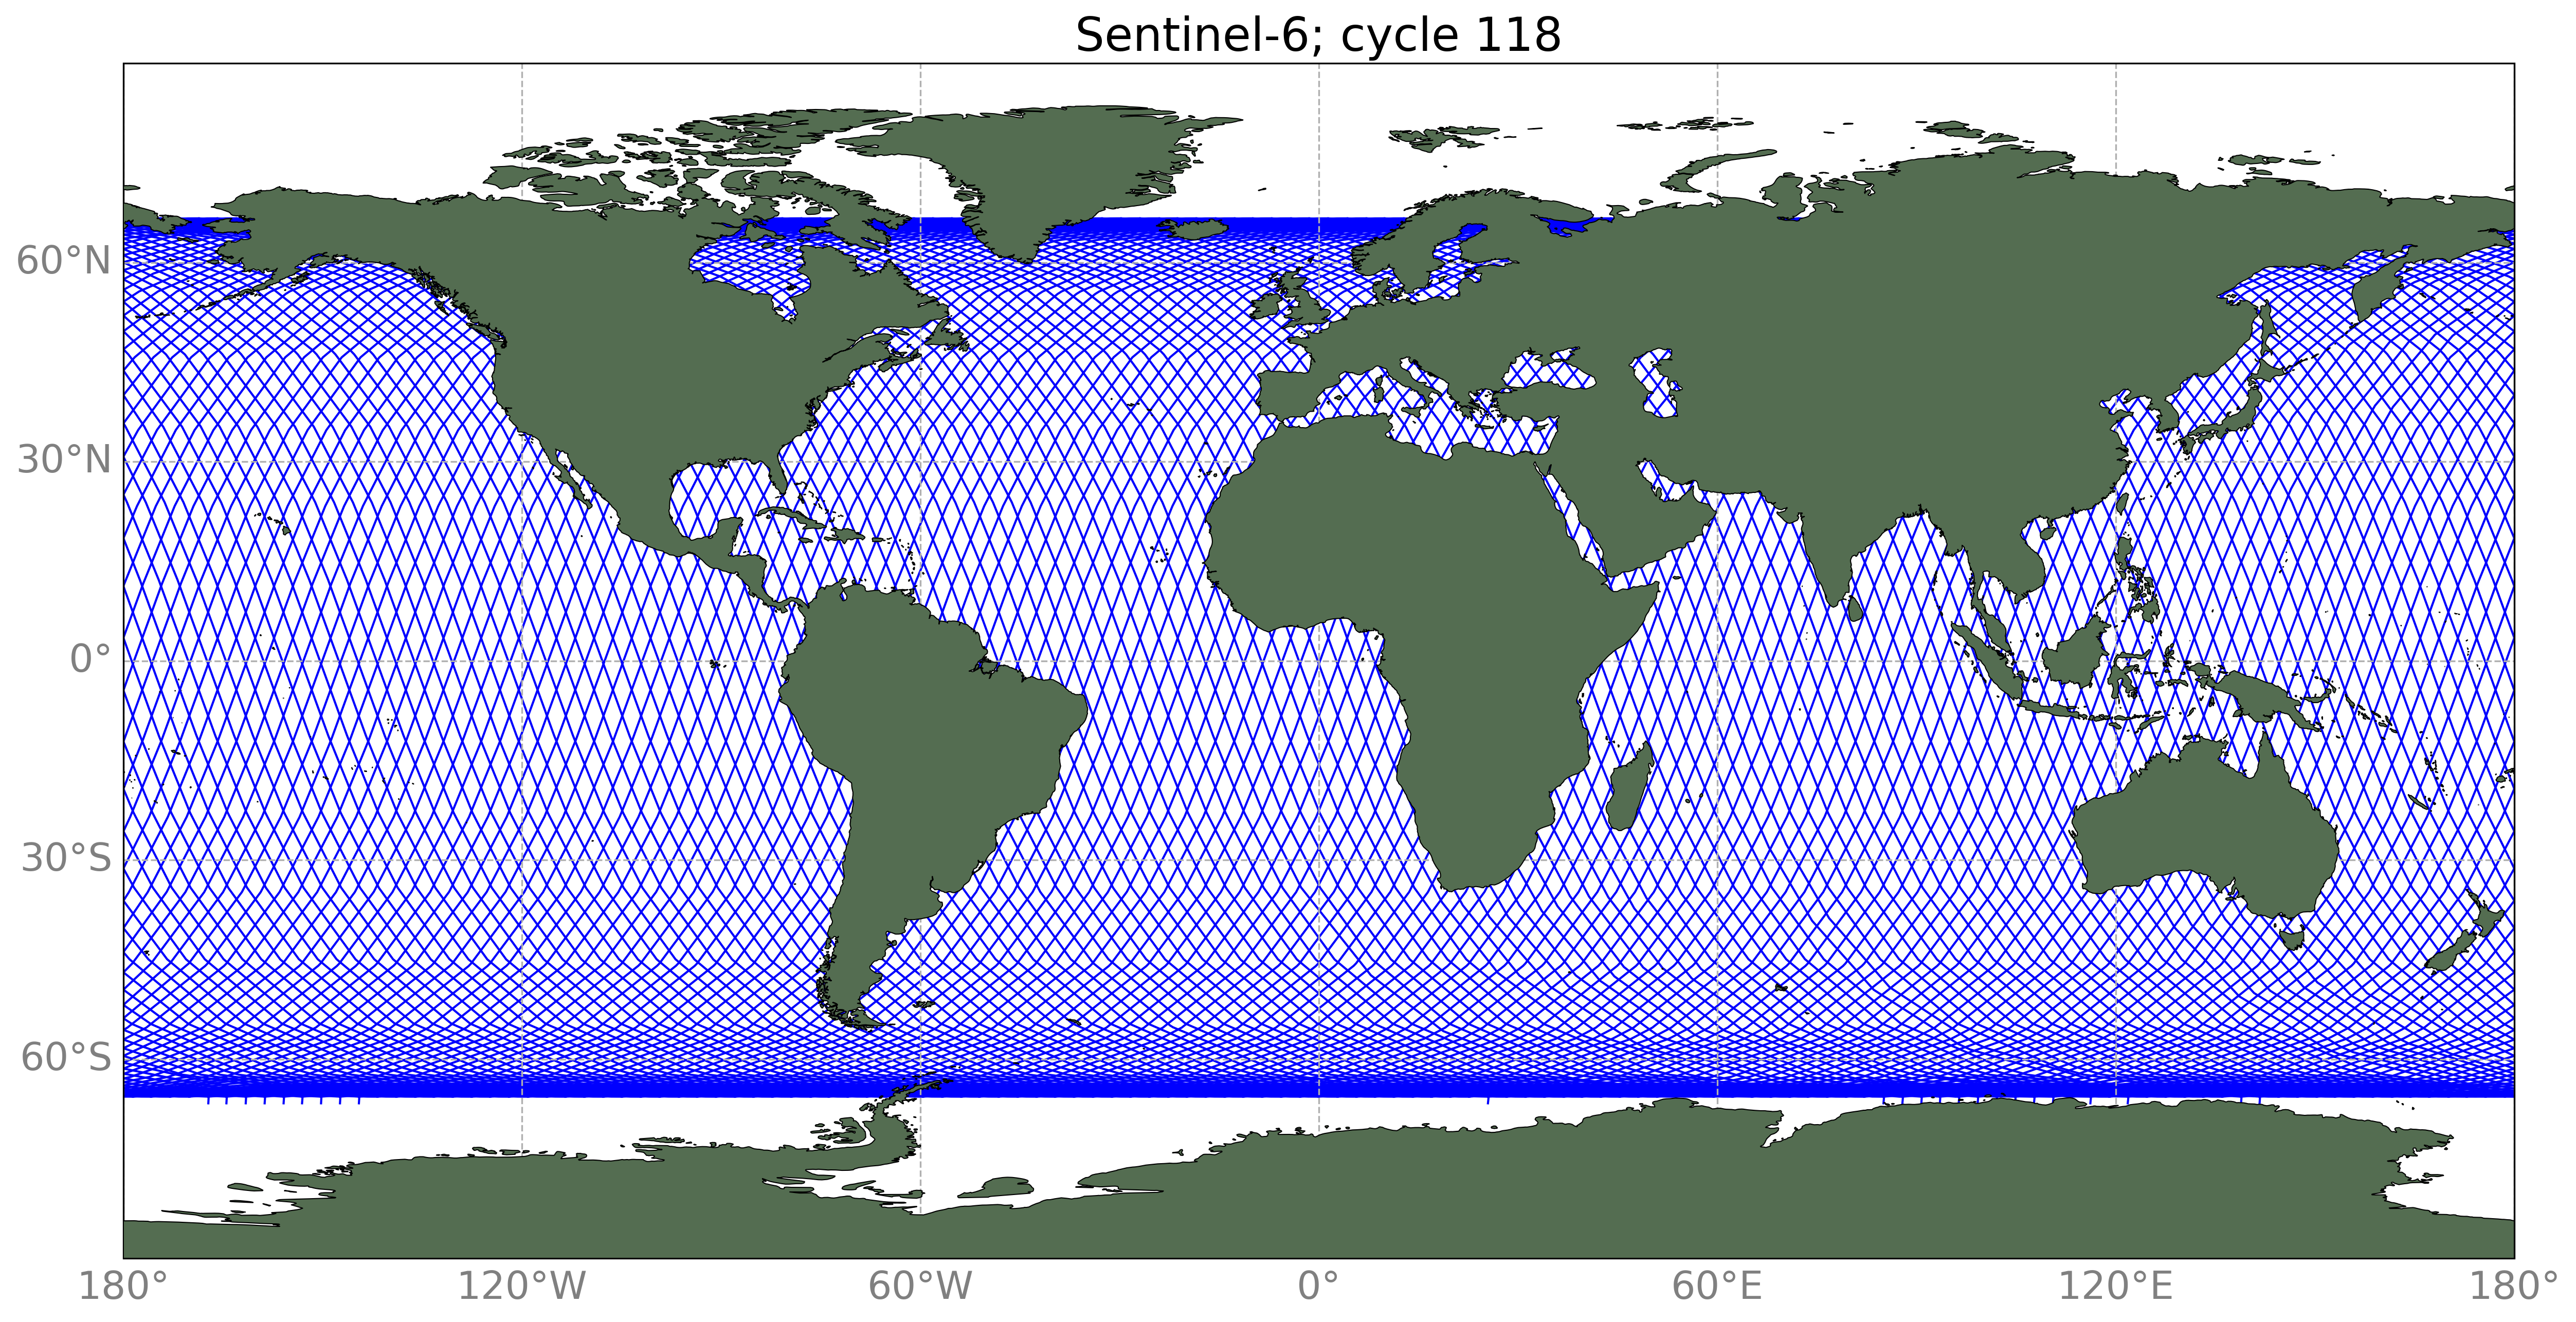

In [18]:
fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

for polygon in polygons:
    coords = np.asarray(polygon.split(' ')).astype('float')
    halfway = round(len(coords) / 4) * 2
    p, = m.plot(coords[1:halfway:2], coords[0:halfway:2], color='b', 
                linewidth=1, transform=cartopy.crs.Geodetic(), zorder=1)

# add some map embellishments
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
m.set_global()

g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}
plt.title(f'Sentinel-6; cycle {S6_cycle}')
plt.show()

There we have it, a full cycle of tracks from Sentinel-6! We can see from the track mesh that, due to the orbital inclination angle of Sentinel-6 (66$^{o}$), we only sample the ocean between 66$^{o}$S and 66$^{o}$N, but have dense coverage over the 10-day cycle in between. Sentinel-6B will compliment this, and is currenrly due for launch in 2026.

If we wanted to, we could replicate the process above using the `eumdac` command line interface (CLI) as follows, and making the relevant substitutions.

`eumdac search -c <collectionID> --cycle <cycle_number> --timeliness <timeliness> >> products_cycle_number.txt`

`eumdac download -c <collectionID> -p @products_cycle_number.txt`

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Searching for our specified products by relative orbit
[Back to top](#TOCTOP)

</div>

Lets now repeat the process, but prune by relative orbit. This is simple for Sentinel-3, as can be done like so;

In [19]:
S3_products = S3_collection.search(relorbit=S3_relorbit, orbitdir=S3_orbitdir, timeliness=timeliness)
print(len(S3_products))

29


For Sentinel-6 it is a bit more complicated as we need to manualy determine the orbit direction from the relative pass number in the filename (see the top of this notebook for more information). 

*Note: In the future this information will be encoded in the EUMETSAT Data Store.*

In [20]:
S6_products = S6_collection.search(relorbit=S6_relorbit, timeliness=timeliness)

# get the descending passes (even numbered relative passes)
S6_products_prune = []
for product in S6_products:
    rel_pass = int(str(product).split('_')[15])
    if S6_orbitdir == "ASCENDING" and (rel_pass % 2) == 1:
        S6_products_prune.append(product)
    elif S6_orbitdir == "DESCENDING" and (rel_pass % 2) == 0:
        S6_products_prune.append(product)

S6_products = S6_products_prune
print(len(S6_products))

41


Lets download exactly we did in the previous experiment, but store the output in out `download_rel_orbit` directory;

In [21]:
if download_data:
    downloaded_components = []
    
    for product, count in zip(S6_products, range(len(S6_products))):
    
        product_download_directory = os.path.join(download_dir_relorbit, str(product))
        os.makedirs(product_download_directory, exist_ok=True)
    
        # download the required product components
        for entry in product.entries:
            res = [ele for ele in components if(ele == os.path.basename(entry))]
            if res:
                with product.open(entry=entry) as fsrc, open(os.path.join(product_download_directory, fsrc.name),
                                                            mode='wb') as fdst:
                    downloaded_components.append(os.path.join(product_download_directory, fsrc.name))
                    print(f'Downloading ({count+1}/{len(S6_products)}) {product}: {fsrc.name}.')
                    shutil.copyfileobj(fsrc, fdst)
else:
    downloaded_components = sorted(glob.glob(os.path.join(download_dir_relorbit, "*", components[0])))

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Plotting a relative orbit
[Back to top](#TOCTOP)

</div>

...and finally, lets plot the data. As before, we can collect then track coverage data from the manifest files and store these in a list (called `polygons`).

In [22]:
polygons = []
for downloaded_component in downloaded_components:
    tree = ET.parse(downloaded_component)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':'http://www.opengis.net/gml'})
    polygons.append((polygon[0].text))

Finally, lets iterate through these polygons and plot them in turn.

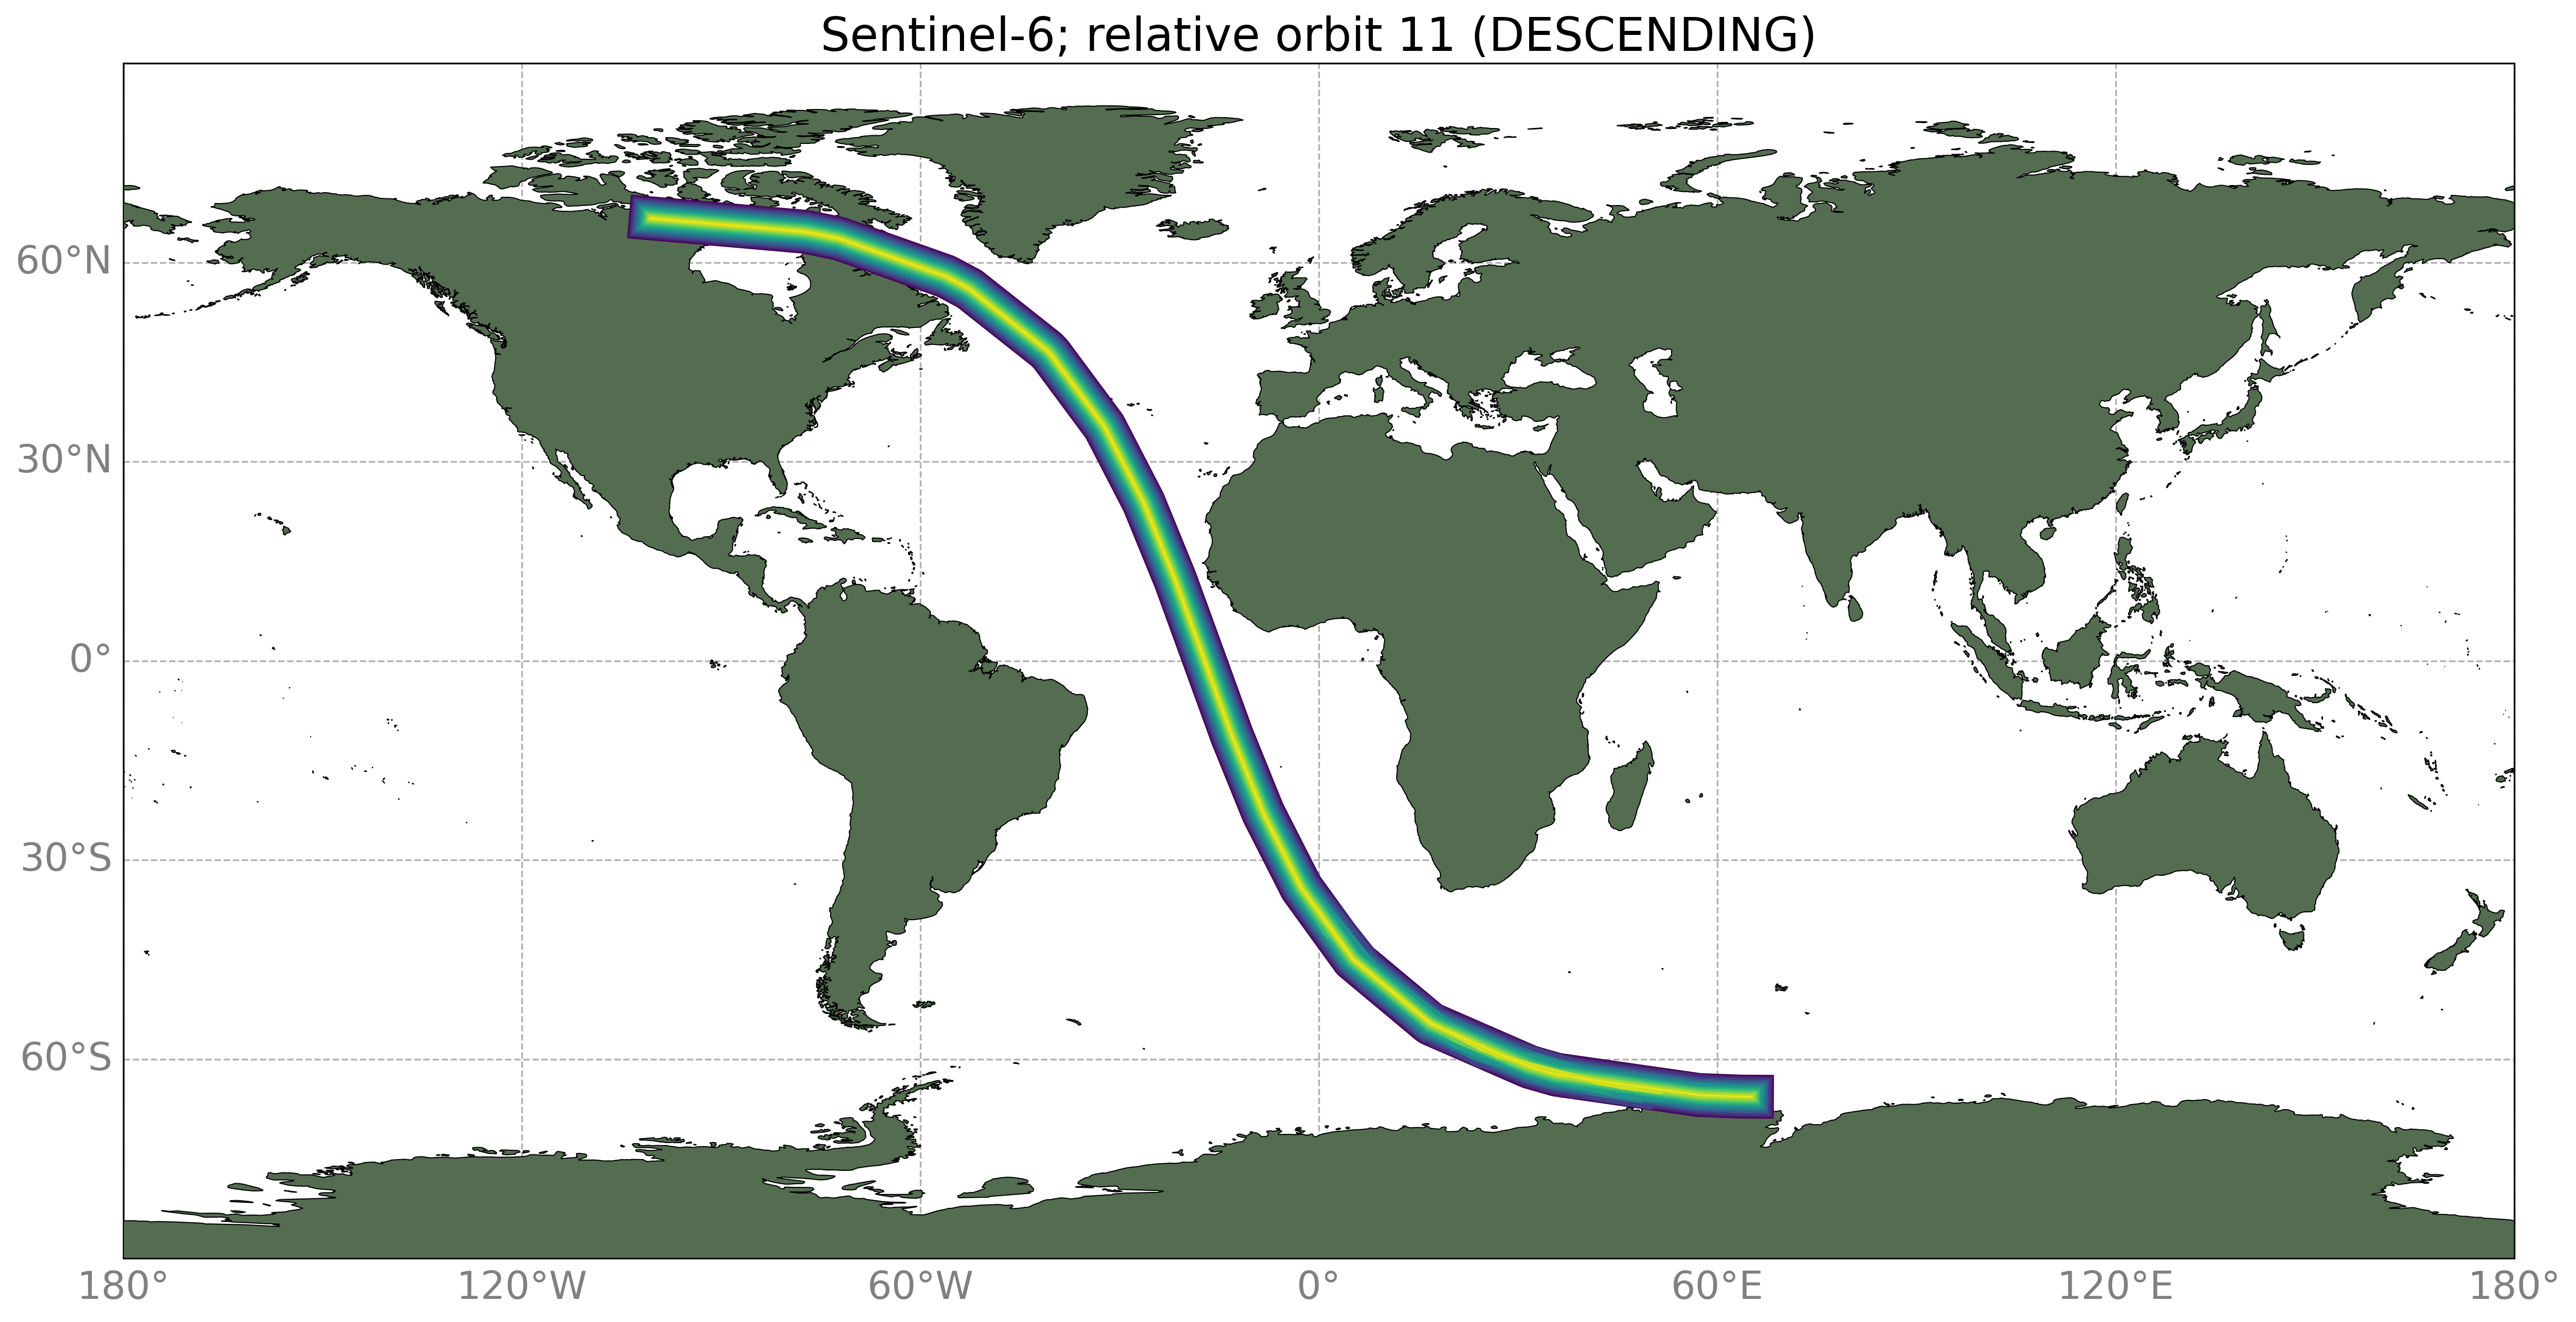

In [23]:
fig, m = plt.subplots(1, 1, figsize=(20, 20), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

for polygon, count in zip(polygons, range(len(polygons))):
    coords = np.asarray(polygon.split(' ')).astype('float')
    halfway = round(len(coords) / 4 - 1) * 2
    p, = m.plot(coords[1:halfway:2], coords[0:halfway:2], c=plt.cm.viridis(count/len(polygons)), 
                transform=cartopy.crs.Geodetic(), zorder=10, linewidth=(len(polygons)-count)/2)

# add some map embellishments
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
m.set_global()
g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}
plt.title(f'Sentinel-6; relative orbit {S6_relorbit} ({S6_orbitdir})')
plt.show()

Each track above is plotted in a different colour and thickness, with older, thicker tracks in purple, and newer, thinner tracks in yellow. You can see that, line-thickness aside, all the tracks overlay each other and have the same coverage, meaning that we can use this approach to build timeseries over each point.

If we wanted to, we could replicate the process above using the `eumdac` command line interface (CLI) as follows, and making the relevant substitutions.

`eumdac search -c <collectionID> --relorbit <relative_orbit_number> --timeliness <timeliness> >> products_relorbit.txt`

`eumdac download -c <collectionID> -p @products_relorbit.txt`

<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Conclusions
[Back to top](#TOCTOP)

</div>

In this notebook we have shown how to prune altimetry searches and downloads by orbital parameter. For altimetry applications, this approach is usually more useful than using time and/or region of interest based searching. You can apply the above approaches to select any Sentinel-3 or Sentinel-6 altimetry data, adapting the cycles and rleative orbits to your own requirements.

<div class="alert alert-warning" role="alert">

## <a id='section9'></a>9. Challenge (Optional)
[Back to top](#TOCTOP)

</div>

When you have run the script with the default settings, why not try to;
* combine the searches above to isolate a single pass in a single cycle, or
* adapt the components to download the actual data for a given satellite and plot the sea surface height anomaly data across a single cycle

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>